In [29]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hmmlearn import hmm

# Task 1

In [30]:
# Referred to this:
# https://hmmlearn.readthedocs.io/en/stable/auto_examples/plot_casino.html

In [31]:
# loading dataset rolls.npy
data = np.load('rolls.npy')
# shuffle the data usinng seed 13
np.random.seed(13)
# np.random.shuffle(data)
print(np.shape(data))

(50000, 1)


In [32]:
# splitting into train and validation
N = np.floor(len(data)*0.5)
N = int(N)
train_data = data[:N]
valid_data = data[N:]

In [33]:
fair_die_probabilities = np.ones(6)/6
t = np.random.rand(6)
loaded_die_probabilities = t/np.sum(t)
print(fair_die_probabilities)
print(loaded_die_probabilities)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0.18379657 0.05613878 0.19480403 0.22823819 0.22985752 0.10716492]


In [34]:
# running on a model
HMM = hmm.CategoricalHMM(n_components=2, tol=0.001, n_iter=1000) # copilot
HMM.startprob_ = np.array([1, 0]) #initially fair
HMM.emissionprob_ = np.array([fair_die_probabilities, loaded_die_probabilities])
HMM.transmat_ = np.array([[0.95, 0.05], [0.1, 0.9]])
HMM.fit(train_data.reshape(-1,1))
print(HMM.score(valid_data.reshape(-1,1))) # for scoring

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'emissionprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'e'


-43189.66380119868


In [35]:
# experimenting with differnet emission probabilities

num_experiments = 20
scores_experiments = []
fair_die_probabilities = np.ones(6)/6
emmission_die_probabilities = np.zeros((num_experiments, 6))
for i in range(num_experiments):
    t = np.random.rand(6)
    emmission_die_probabilities[i] = t/np.sum(t)

    # running on a model
    HMM = hmm.CategoricalHMM(n_components=2, tol=0.001, n_iter=1000, init_params='') # copilot
    HMM.startprob_ = np.array([1, 0]) #initially fair
    HMM.emissionprob_ = np.array([fair_die_probabilities, emmission_die_probabilities[i]])
    HMM.transmat_ = np.array([[0.95, 0.05], [0.1, 0.9]])
    HMM.fit(train_data.reshape(-1,1))
    scores_experiments.append(HMM.score(valid_data.reshape(-1,1)))



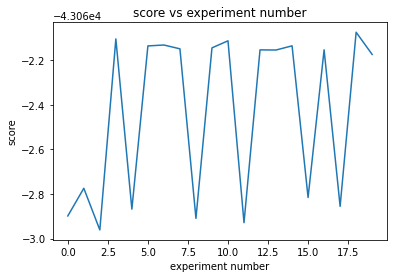

In [36]:
# plotting the results
plt.figure()
plt.plot(scores_experiments)
plt.xlabel('experiment number')
plt.ylabel('score')
plt.title('score vs experiment number')
plt.show()

In [37]:
# finding the best emission probabilities
best_index = np.argmax(scores_experiments)
best_emmission_die_probabilities = emmission_die_probabilities[best_index]
print('best emmission die probabilities', best_emmission_die_probabilities)
print('best score', scores_experiments[best_index])

best emmission die probabilities [0.14393746 0.29328266 0.0274822  0.24045079 0.27868062 0.01616626]
best score -43062.07365806069


In [38]:
# running the best model on validation set
HMM_best = hmm.CategoricalHMM(n_components=2, tol=0.001, n_iter=1000, init_params='') # copilot
HMM_best.startprob_ = np.array([1, 0]) #initially fair
HMM_best.emissionprob_ = np.array([fair_die_probabilities, best_emmission_die_probabilities])
HMM_best.transmat_ = np.array([[0.95, 0.05], [0.1, 0.9]])
HMM_best.fit(train_data.reshape(-1,1))
print('best model score', HMM_best.score(valid_data.reshape(-1,1)))

best model score -43062.07365806069


/tmp/ipykernel_514588/3630275913.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


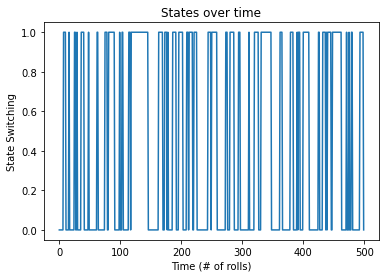

In [39]:
# simulate the loaded dice rolls (using the reference link)
rolls, gen_states = HMM_best.sample(30000)

# plot states over time, let's just look at the first rolls for clarity
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State Switching')
fig.show()


Text(0.5, 1.0, 'hidden state vs roll number')

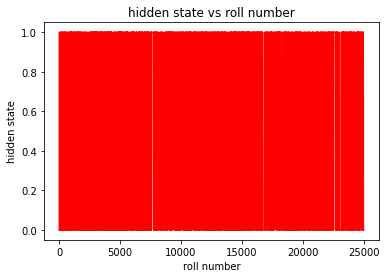

In [40]:
# plotting the generated states
hidden_states =  HMM_best.predict(valid_data.reshape(-1,1))

# plotting the results
plt.figure()
# plt.plot(valid_data, 'b')
plt.plot(hidden_states, 'r')
plt.xlabel('roll number')
plt.ylabel('hidden state')
plt.title('hidden state vs roll number')

# Task 3 Part 1 Q4
 This is the decoding problem in HMMs

In [42]:
# We will use our best model to find out the transition and emission probabilities
# Transition probabilities correspond to the probability of switching from one state to another. In our case, switching die
# Emission probabilities correspond to the probability of how our die is loaded

Transition probabilities
[[0.84827856 0.15172144]
 [0.1727771  0.8272229 ]]


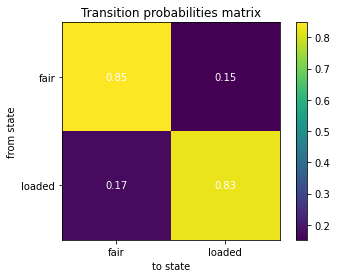

In [43]:
# Transition probabilities
print('Transition probabilities')
print(HMM_best.transmat_)

# make a heatmap of the transition probabilities matrix

plt.figure()
plt.imshow(HMM_best.transmat_ )
plt.colorbar()
# print the values on heatmap
for i in range(2):
    for j in range(2):
        plt.text(i, j, np.round(HMM_best.transmat_[j, i], 2), ha="center", va="center", color="w")
# label the heat map
plt.xticks([0,1], ['fair', 'loaded'])
plt.yticks([0,1], ['fair', 'loaded'])
plt.xlabel('to state')
plt.ylabel('from state')
plt.title('Transition probabilities matrix')
plt.show()


emission probabilities
[[0.10816304 0.11467695 0.10555914 0.10826009 0.11266245 0.45067835]
 [0.1719832  0.16328072 0.17571897 0.1682792  0.17096535 0.14977255]]


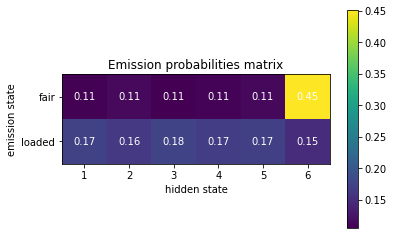

In [44]:
# emission probabilities
print('emission probabilities')
print(HMM_best.emissionprob_)

# make a heatmap of the emission probabilities matrix

plt.figure()
plt.imshow(HMM_best.emissionprob_ )
plt.colorbar()
# print the values on heatmap
for i in range(2):
    for j in range(6):
        plt.text(j, i, np.round(HMM_best.emissionprob_[i, j], 2), ha="center", va="center", color="w")
# label the heat map (copilot)
plt.yticks([0,1], ['fair', 'loaded'])
plt.xticks([0,1,2,3,4,5], ['1', '2', '3', '4', '5', '6'])
plt.xlabel('hidden state')
plt.ylabel('emission state')
plt.title('Emission probabilities matrix')
plt.show()


# Task 3 Part 2 and 3 Q2
Both of the above are learning problems in HMMs

# Task 4

In [46]:
# loading the runs.npy
data = np.load('runs.npy')
# shuffle the data usinng seed 13
# np.random.seed(13)
# np.random.shuffle(data)
print(np.shape(data))

N = np.floor(len(data)*0.5)
N = int(N)
train_data = data[:N]
valid_data = data[N:]


(30000, 1)


In [47]:
# virats probability such that more probability to hit 1 and 2s
def virat_prob():
    r_0 = np.random.uniform(0.05 , 0.1)
    r_1 = np.random.uniform(0.2,0.3)
    r_2 = np.random.uniform(0.2, 0.3)
    r_3 = np.random.uniform(0.1,0.2)
    r_4 = np.random.uniform(0.1,0.2)
    r_6 = np.random.uniform(0.1,0.2)
    v = np.array([r_0,r_1,r_2,r_3,r_4,r_6])
    v = v / np.sum(v)
    return v
    
# rohits probability such that more probability to hit 4s and 6s
def rohit_prob():
    r_0 = np.random.uniform(0.05 , 0.1)
    r_1 = np.random.uniform(0.1,0.2)
    r_2 = np.random.uniform(0.1, 0.2)
    r_3 = np.random.uniform(0.1,0.2)
    r_4 = np.random.uniform(0.2,0.3)
    r_6 = np.random.uniform(0.2,0.3)
    r = np.array([r_0,r_1,r_2,r_3,r_4,r_6])
    r = r / np.sum(r)
    return r
    

In [48]:
num_experiments = 20

probability_virat_plays= []
probability_rohit_plays = []

scores = []

for i in range(num_experiments):
    # running on a model
    HMM = hmm.GaussianHMM(n_components=2, tol=0.001, n_iter=1000, init_params='') # copilot

    v = virat_prob()
    r = rohit_prob()

    HMM.emissionprob_ = np.array([v , r]) # probability to hit 0,1,2,3,4,6
    HMM.transmat_ = np.array([[0.7,0.3], [0.3,0.7]]) # probability to switch from one player to another

    probability_virat_plays.append(v)
    probability_rohit_plays.append(r)

    HMM.fit(train_data)
    score = HMM.score(train_data)
    scores.append(score)

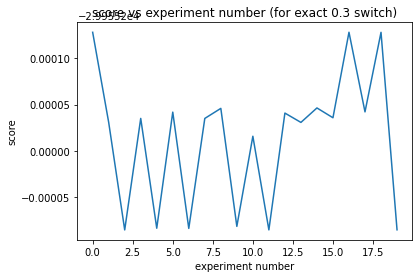

In [49]:
# plotting the scores
plt.figure()
plt.plot(scores)
plt.xlabel('experiment number')
plt.ylabel('score')
plt.title('score vs experiment number (for exact 0.3 switch)')
plt.show()


In [50]:
# best model. its score and emission probabilities
best_index = np.argmax(scores)  
best_v = probability_virat_plays[best_index]
best_r = probability_rohit_plays[best_index]
print('best v', best_v)
print('best r', best_r)
print('best score', scores[best_index])


best v [0.08314216 0.2816678  0.20889636 0.16998708 0.15312103 0.10318556]
best r [0.06417121 0.16725676 0.12271908 0.10867054 0.25792068 0.27926174]
best score -29955.199871846802


In [51]:
# best transition matrix of the best scoring model
HMM_best = hmm.GaussianHMM(n_components=2, tol=0.001, n_iter=1000, init_params='') # copilot
HMM_best.emissionprob_ = np.array([best_v, best_r])
HMM_best.transmat_ = np.array([[0.7,0.3], [0.3,0.7]])
HMM_best.fit(train_data)



GaussianHMM(init_params='', n_components=2, n_iter=1000, tol=0.001)

In [52]:
# printing the optimal transition matrix of the best scoring model
print('optimal transition matrix')
print(HMM_best.transmat_)

optimal transition matrix
[[0.54987891 0.45012109]
 [0.4683878  0.5316122 ]]


In [53]:
# printing the optimal emission matrix of the best scoring model
print('optimal emission matrix')
print(HMM_best.emissionprob_)

optimal emission matrix
[[0.08314216 0.2816678  0.20889636 0.16998708 0.15312103 0.10318556]
 [0.06417121 0.16725676 0.12271908 0.10867054 0.25792068 0.27926174]]


In [54]:
# printing the optimal start probabilities of the best scoring model
print('optimal start probabilities')
print(HMM_best.startprob_)

optimal start probabilities
[3.37557844e-31 1.00000000e+00]


In [55]:
# predicting who played the first ball
print('predicted who played the first ball')

if(HMM_best.predict(train_data[0].reshape(1,-1)) == 0):
    print('virat played the first ball')
else:
    print('rohit played the first ball')


predicted who played the first ball
rohit played the first ball


In [56]:
# predicting who played the last ball
print('predicted who played the last ball')

if(HMM_best.predict(train_data[-1].reshape(1,-1)) == 0):
    print('virat played the last ball')
else:
    print('rohit played the last ball')

predicted who played the last ball
rohit played the last ball
